## Sentiment Analysis of Amazon reviews for BD Coffee make

In this notebook, the reviews from Amazon on Black and Decker Coffee Maker analyzed. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

#### Data Preparation and Visualization:

In [13]:
#reading the sqlite file and making a df from the data
con = sqlite3.connect("Amazon.sqlite")
df = pd.read_sql_query("SELECT * from BDCoffeeMaker", con)

In [14]:
#Showing the head of the dataset
df.head()

,rating,date,location,color,review_title,review,comment
0,1.0,June-19-2017,United States,Color: Black/Stainless Steel,Stopped working within 2 months.,My last coffee maker was the cheapest one I sa...,4
1,1.0,January-20-2018,United States,Color: Black/Stainless Steel,Eating coffee grounds ...,Update. It's been 9 months and I will be throw...,3
2,5.0,November-22-2019,United States,Color: Black/Stainless Steel,Morning partner!,Went from my expensive keurigg to this cheap a...,0
3,1.0,April-28-2019,United States,Color: Black/Stainless Steel,Update: Now not working at all,Update: This is the worst coffee pot I've ever...,2
4,1.0,August-9-2019,United States,Color: Black/Stainless Steel,3rd day and it's already broken,Very very VERY disappointed and frustrated. T...,1


In [15]:
df.shape

(2263, 7)

Checking to see if there is any null data in our dataset:

In [16]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,location,color,review_title,review,comment


Changing the rating values to a binary form. To do this, first we check the relationship between rating and comments:

In [17]:
#converting the data to numerical
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
df['comment'] = pd.to_numeric(df['comment'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

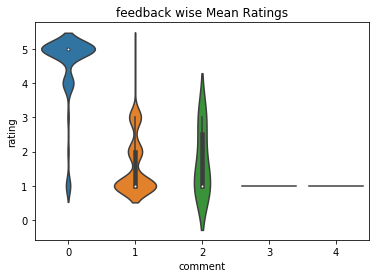

In [18]:
sns.violinplot(df['comment'], df['rating'])
plt.title("feedback wise Mean Ratings")
plt.show()

We assign ratings above 3 as 1 and below 3 as 0.

In [19]:
df['rating'] = np.where(df['rating'] >= 3, 1, 0)

In [20]:
df.sample(10)

,rating,date,location,color,review_title,review,comment
1073,1,October-25-2019,United States,Color: Black/Stainless Steel,I love it,"We finally got a new coffe maker, its defenely...",0
2109,1,February-9-2018,United States,Color: Black/Stainless Steel,Makes good coffee.,Works well. Makes good coffee.,0
307,1,February-2-2020,United States,Color: Black/Stainless Steel,Works great for the price,This works great! I wish it would stay on for ...,0
1407,1,February-29-2020,United States,Color: Black/Stainless Steel,AMAZING PRODUCT.,GREAT PRICE.,0
629,0,April-6-2018,United States,Color: Black/Stainless Steel,Coffee maker that didnt tell time.,"My daughter needed a new coffee maker, for som...",1
1653,1,January-27-2020,United States,Color: Black/Stainless Steel,Cheaply Made,I’ve been buying this same model coffee maker ...,1
627,1,January-8-2020,United States,Color: Black/Stainless Steel,Affordable,Good product with a good price. I might buy ag...,0
827,1,April-26-2019,United States,Color: Black/Stainless Steel,It is alright for the price,Coffee pot is alright for the price. Don't li...,1
730,1,January-1-2020,United States,Color: Black/Stainless Steel,Love it,Just the right size and it works great,0
1035,1,January-30-2018,United States,Color: Black/Stainless Steel,Leaked water out of the bottom all over counte...,All was fine until a week ago and when I poure...,0


Performing some statistical analysis on the data

In [21]:
df.describe()

,rating,comment
count,2263.000000,2263.000000
mean,0.761821,0.228016
std,0.426064,0.448173
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,4.000000


In [22]:
df.groupby('rating').describe()

comment                                             
         count      mean       std  min  25%  50%  75%  max
rating                                                     
0        539.0  0.784787  0.515621  0.0  1.0  1.0  1.0  4.0
1       1724.0  0.053944  0.231053  0.0  0.0  0.0  0.0  2.0

According to the table above most of the users are satisfied with the BD cofee maker.

Here we will add a new column to our dataframe and will check the length of the reviews:

In [23]:
#Adding a new column and entering the length of the reviews:
df['length_of_review'] = df['review'].apply(len)
df.head()

,rating,date,location,color,review_title,review,comment,length_of_review
0,0,June-19-2017,United States,Color: Black/Stainless Steel,Stopped working within 2 months.,My last coffee maker was the cheapest one I sa...,4,417
1,0,January-20-2018,United States,Color: Black/Stainless Steel,Eating coffee grounds ...,Update. It's been 9 months and I will be throw...,3,458
2,1,November-22-2019,United States,Color: Black/Stainless Steel,Morning partner!,Went from my expensive keurigg to this cheap a...,0,333
3,0,April-28-2019,United States,Color: Black/Stainless Steel,Update: Now not working at all,Update: This is the worst coffee pot I've ever...,2,1832
4,0,August-9-2019,United States,Color: Black/Stainless Steel,3rd day and it's already broken,Very very VERY disappointed and frustrated. T...,1,900


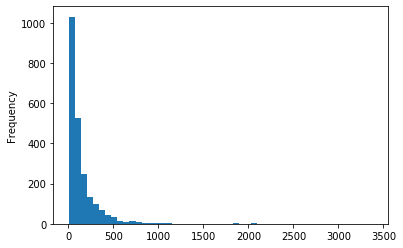

In [24]:
#Plotting the histogram of the length of reviews
df['length_of_review'].plot(bins=50, kind='hist');

The above Distribution Plot, shows a distribution of Length of the Reviews written by the people.This is to show on an average what is the length of the reviews written by the people for amazon alexa. Most of the Reviews are so short that is only One or Two words longer. We can see that most people write reviwes that is 5-20 words longer.